![Deep Learning for Scientists in a hurry](./fig/Title.png)

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2022-08-19T21:04:08.431998-04:00

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 8.4.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 3.10.0-1160.24.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 52
Architecture: 64bit



In [3]:
import time
start = time.time()
chapter_number = 5
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image

2022-08-19 21:04:09.131087: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
%watermark -iv

PIL       : 9.2.0
keras     : 2.9.0
numpy     : 1.21.1
tensorflow: 2.9.1+nv22.07
matplotlib: 3.5.0



In [6]:
epoch_reduction_factor = 1.0
if len(tf.config.list_physical_devices('GPU')) == 0:
    print("Using TensorFlow CPU only, lowering the number of epochs")
    epoch_reduction_factor = 0.25

# Convolutional Neural Networks with TensorFlow

Computer vision was one of the first big stories of success for Deep Learning. Part of that success is due to Convolutional neural networks an architecture tailored for this kind of problem.

The purpose of this notebook is to present how we can create Deep Learning models that use Convolutional Neural Networks with TensorFlow and Keras as its high-level interface.

## The basic theme, Conv2D + MaxPooling

Let's start with the CNN that we just saw in a previous notebook. The network that we used for classification of handwritten digits.

In [7]:
from tensorflow.keras import layers

This time we will use the Functional API, a variation that will give us more flexibility when we scale for more complex problems

In [8]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

2022-08-19 21:04:10.820622: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-19 21:04:12.111516: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21326 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:89:00.0, compute capability: 7.5
2022-08-19 21:04:12.112705: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 21326 MB memory:  -> device: 1, name: Quadro RTX 6000, pci bus id: 0000:8a:00.0, compute capability: 7.5
2022-08-19 21:04:12.113714: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/de

As usual this is the model's summary

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

Just to remember, we will recreate very quickly the training of MNIST

In [10]:
path = './data/keras/datasets/mnist.npz'

import numpy as np

with np.load(path, allow_pickle=True) as f:
    train_images, train_labels = f['x_train'], f['y_train']
    test_images, test_labels = f['x_test'], f['y_test']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
#from tensorflow.keras.datasets import mnist
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

Compile the model

In [14]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

And train it:

In [15]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5


2022-08-19 21:04:14.416469: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


938/938 [==============================] - 4s 2ms/step - loss: 0.1552 - accuracy: 0.9512
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0439 - accuracy: 0.9867
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0308 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0223 - accuracy: 0.9934
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0187 - accuracy: 0.9945


Finally we evaluate the network using the test set.

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0352 - accuracy: 0.9894
Test accuracy: 0.989


### The convolution operation `layers.Conv2D `

Convolutional Neural Networks are effective because convolutions offer two important properties:

   1. **Translational Invariance**
    
      Once the network selects a kernel because it captures features that can be found on portions of the image. 
       
      See the example below. The small kernel will be applied for all the images and places where it returns a high value will propagate that information to the next layers.
  
![ConvNet](./fig/ConvNet.jpeg)

   2. **Spatial Hierachies**

      The first layer is capturing features that fit in the $3 \times 3$ grid. The next layer will learn more features associated with the transformations from the first layer. In a way is composing the features into higher and higher levels of complexity.

A Conv2D has this list of arguments:

```python
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```

From these, the first one is the number of filters, ie the number of channels returned. The second is the size of the kernel. Typically Kernels are $3 \times 3$ or $5 \times 5$. For small images $3 \times 3$ is the most often used. The other two arguments strides and padding we explain below:

#### Border effects and padding

Check what happens in the network above:

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

Each convolution is returning a smaller map than the previous one. That is due to border effects. The border effect can be controlled with **padding**.

Padding is the strategy used on the borders. `Conv2D` offers two options:

   1. `padding="valid"` : Will only operate the convolution if the kernel fits the portion of the image at that index. This results in a new map that has a shape $(n-1,n-1)$ compared with the original.
   
   2. `padding="same"` : This padding will add extra columns and rows on the border with zeros such that the final map has the same shape as the original one.

#### Convolution strides

The other parameter that you control in Conv2D is the stride. It is the movement from one convolution to the next one. By default, the stride is 1. Bigger strides will end up with smaller output maps.

### The max-pooling operation `layers.MaxPooling2D`

Usually after a Conv2D, you see a MaxPooling. MaxPooling will take a grid of values and will return the maximum in the grid.

```python
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
)
```

There are several reasons to use `MaxPooling2D`

  1. It helps to reduce the output map shape. After a MaxPooling, the size of the resulting maps is cut in half so deeper layers work with smaller maps. As compensation, deeper layers have more channels, ie they capture more general features. 
  
  2. It expands the window of operation for deeper layers
  
  3. When the time comes to produce the dense layers for classification, the network will have less number of neurons.
  
Consider for example this model when we have removed the `MaxPooling2D`:

In [18]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [19]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

The network above is huge, with 700k weights that will likely be very hard to train, produce a lot of overfitting and even produce bad results because the deeper layers can only explore a small vicinity of the first layers.

## Training a CNN on a small dataset

In real problems data is often not abundant, only big tech companies have the resources to collect, clean and prepare large datasets with thousands even million of cases. A more realistic scenario is to have a few hundred, maybe a thousand or few thousand cases. How to be successful with such small datasets?

In this example we will explore the techniques used with small datasets. In summary, there are 3 techniques that can be explored:

   1. **Data Augmentation**: Create more data by introducing variations from the original set to cure for overfitting.
   
   2. **Feature extraction with Pretrained Model**: There are very good CNNs already trained with very large datasets that are ready to use with minimal changes.
   
   3. **Fine-tunning pretrained**: Kernels can be retrained for our purposes with minimal changes. 



### Downloading the data

The Dogs vs Cats dataset is a collection made available on Kaggle for a competition in 2013.

In [20]:
import os
import zipfile

In [21]:
zf1 = zipfile.ZipFile("./data/dogs-vs-cats.zip")
zf1.filelist

[<ZipInfo filename='sampleSubmission.csv' compress_type=deflate file_size=88903 compress_size=27679>,
 <ZipInfo filename='test1.zip' compress_type=deflate file_size=284321224 compress_size=283572771>,
 <ZipInfo filename='train.zip' compress_type=deflate file_size=569546721 compress_size=567975793>]

In [22]:
zf1.extract('train.zip', '/tmp/GAF')
zf1.close()
zf2 = zipfile.ZipFile("/tmp/GAF/train.zip")
zf2.extractall("/tmp/GAF")
zf2.close()
os.remove("/tmp/GAF/train.zip")

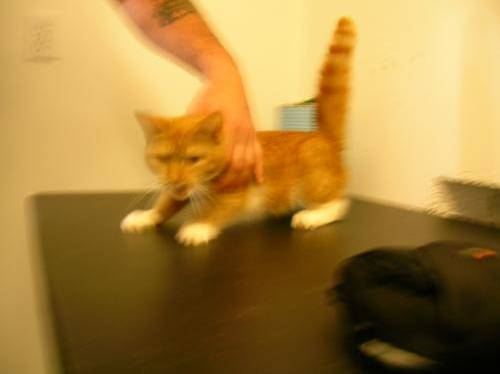

In [23]:
img = Image.open("/tmp/GAF/train/cat.0.jpg")
img

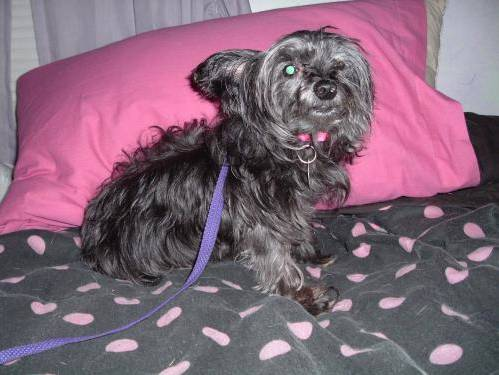

In [24]:
img = Image.open("/tmp/GAF/train/dog.0.jpg")
img

**Copying images to training, validation, and test directories**

In [25]:
import os, shutil, pathlib

original_dir = pathlib.Path("/tmp/GAF/train")
new_base_dir = pathlib.Path("/tmp/GAF/cats_vs_dogs_small")

if os.path.isdir("/tmp/GAF/cats_vs_dogs_small"):
    shutil.rmtree("/tmp/GAF/cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [27]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [28]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [29]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [30]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [31]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [32]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [33]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [34]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./output/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist_1 = model.fit(
    train_dataset,
    epochs=int(epoch_reduction_factor*30),
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 3s 38ms/step - loss: 0.7791 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5190
Epoch 2/30
63/63 [==============================] - 2s 28ms/step - loss: 0.6983 - accuracy: 0.5310 - val_loss: 0.6855 - val_accuracy: 0.5330
Epoch 3/30
63/63 [==============================] - 2s 27ms/step - loss: 0.6816 - accuracy: 0.6000 - val_loss: 0.6297 - val_accuracy: 0.6500
Epoch 4/30
63/63 [==============================] - 2s 26ms/step - loss: 0.6377 - accuracy: 0.6510 - val_loss: 0.6640 - val_accuracy: 0.6090
Epoch 5/30
63/63 [==============================] - 2s 26ms/step - loss: 0.5854 - accuracy: 0.6985 - val_loss: 0.5934 - val_accuracy: 0.6580
Epoch 6/30
63/63 [==============================] - 2s 27ms/step - loss: 0.5508 - accuracy: 0.7265 - val_loss: 0.5764 - val_accuracy: 0.6860
Epoch 7/30
63/63 [==============================] - 2s 25ms/step - loss: 0.5216 - accuracy: 0.7510 - val_loss: 0.6361 - val_accuracy: 0.6660
Epoch 8/30
63

**Displaying curves of loss and accuracy during training**

In [36]:
history = hist_1

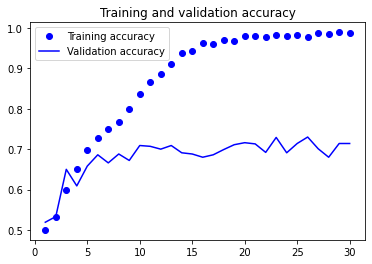

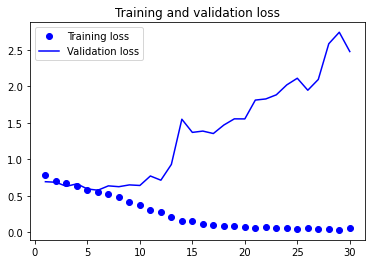

In [37]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [38]:
test_model = keras.models.load_model("./output/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 10ms/step - loss: 0.5941 - accuracy: 0.6735
Test accuracy: 0.674


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [39]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

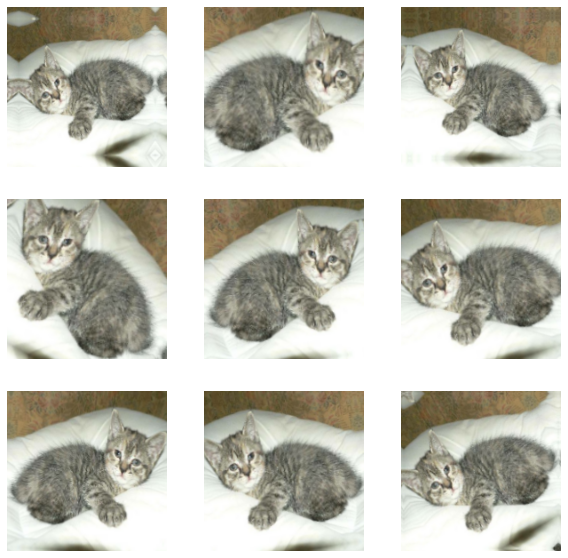

In [40]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [41]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [42]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./output/convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
hist_2 = model.fit(
    train_dataset,
    epochs=int(epoch_reduction_factor*100),
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 3s 36ms/step - loss: 0.7331 - accuracy: 0.5015 - val_loss: 0.6926 - val_accuracy: 0.5400
Epoch 2/100
63/63 [==============================] - 2s 34ms/step - loss: 0.7278 - accuracy: 0.5410 - val_loss: 0.6875 - val_accuracy: 0.6090
Epoch 3/100
63/63 [==============================] - 2s 33ms/step - loss: 0.7045 - accuracy: 0.5720 - val_loss: 0.6900 - val_accuracy: 0.5110
Epoch 4/100
63/63 [==============================] - 2s 34ms/step - loss: 0.7449 - accuracy: 0.5945 - val_loss: 0.6560 - val_accuracy: 0.6010
Epoch 5/100
63/63 [==============================] - 2s 34ms/step - loss: 0.6489 - accuracy: 0.6355 - val_loss: 0.6416 - val_accuracy: 0.6190
Epoch 6/100
63/63 [==============================] - 2s 34ms/step - loss: 0.6499 - accuracy: 0.6310 - val_loss: 0.6110 - val_accuracy: 0.6510
Epoch 7/100
63/63 [==============================] - 2s 33ms/step - loss: 0.6215 - accuracy: 0.6595 - val_loss: 0.8935 - val_accuracy: 0.6120
Epoch 

63/63 [==============================] - 2s 33ms/step - loss: 0.2620 - accuracy: 0.8935 - val_loss: 0.5001 - val_accuracy: 0.8300
Epoch 59/100
63/63 [==============================] - 2s 33ms/step - loss: 0.2525 - accuracy: 0.8965 - val_loss: 0.6306 - val_accuracy: 0.8060
Epoch 60/100
63/63 [==============================] - 2s 33ms/step - loss: 0.2656 - accuracy: 0.8900 - val_loss: 0.4453 - val_accuracy: 0.8540
Epoch 61/100
63/63 [==============================] - 2s 33ms/step - loss: 0.2501 - accuracy: 0.9035 - val_loss: 0.4787 - val_accuracy: 0.8470
Epoch 62/100
63/63 [==============================] - 2s 33ms/step - loss: 0.2521 - accuracy: 0.9035 - val_loss: 0.7992 - val_accuracy: 0.8100
Epoch 63/100
63/63 [==============================] - 2s 33ms/step - loss: 0.2550 - accuracy: 0.9010 - val_loss: 0.5058 - val_accuracy: 0.8290
Epoch 64/100
63/63 [==============================] - 2s 33ms/step - loss: 0.2302 - accuracy: 0.9160 - val_loss: 0.4986 - val_accuracy: 0.8450
Epoch 65/100

**Evaluating the model on the test set**

In [43]:
test_model = keras.models.load_model(
    "./output/convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 10ms/step - loss: 0.4101 - accuracy: 0.8340
Test accuracy: 0.834


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [44]:
conv_base = keras.applications.vgg16.VGG16(
    weights=None,
    include_top=False,
    input_shape=(180, 180, 3))

weights_path='./data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
conv_base.load_weights(weights_path)

In [45]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [46]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


In [47]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [48]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="./output/feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=int(epoch_reduction_factor*20),
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 6ms/step - loss: 21.8496 - accuracy: 0.9150 - val_loss: 4.9309 - val_accuracy: 0.9660
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 3.2816 - accuracy: 0.9735 - val_loss: 5.8494 - val_accuracy: 0.9690
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 1.3325 - accuracy: 0.9885 - val_loss: 4.5408 - val_accuracy: 0.9730
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.9018 - accuracy: 0.9900 - val_loss: 4.0837 - val_accuracy: 0.9780
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 1.4219 - accuracy: 0.9885 - val_loss: 6.0025 - val_accuracy: 0.9700
Epoch 6/20
63/63 [==============================] - 0s 3ms/step - loss: 1.4067 - accuracy: 0.9905 - val_loss: 6.7273 - val_accuracy: 0.9720
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.9950 - val_loss: 5.9190 - val_accuracy: 0.9790
Epoch 8/20
63/63 [=

**Plotting the results**

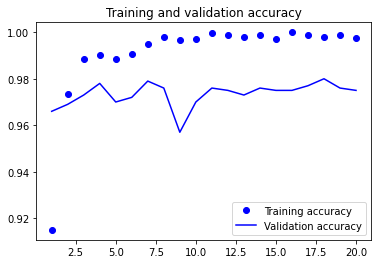

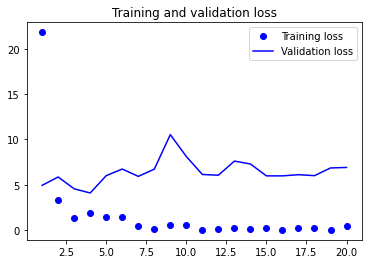

In [49]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [50]:
conv_base  = keras.applications.vgg16.VGG16(
    weights=None,
    include_top=False)

weights_path='./data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
conv_base.load_weights(weights_path)

conv_base.trainable = False

In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Printing the list of trainable weights before and after freezing**

In [52]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [53]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [54]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [55]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./output/feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=int(epoch_reduction_factor*50),
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 6s 88ms/step - loss: 15.9221 - accuracy: 0.8980 - val_loss: 5.4548 - val_accuracy: 0.9640
Epoch 2/50
63/63 [==============================] - 5s 82ms/step - loss: 6.8063 - accuracy: 0.9465 - val_loss: 5.5336 - val_accuracy: 0.9690
Epoch 3/50
63/63 [==============================] - 5s 85ms/step - loss: 7.2990 - accuracy: 0.9450 - val_loss: 4.5769 - val_accuracy: 0.9760
Epoch 4/50
63/63 [==============================] - 5s 85ms/step - loss: 4.3444 - accuracy: 0.9625 - val_loss: 3.2631 - val_accuracy: 0.9830
Epoch 5/50
63/63 [==============================] - 5s 82ms/step - loss: 3.8719 - accuracy: 0.9670 - val_loss: 3.5038 - val_accuracy: 0.9770
Epoch 6/50
63/63 [==============================] - 5s 82ms/step - loss: 5.0034 - accuracy: 0.9595 - val_loss: 6.0411 - val_accuracy: 0.9670
Epoch 7/50
63/63 [==============================] - 5s 82ms/step - loss: 2.6622 - accuracy: 0.9730 - val_loss: 5.0935 - val_accuracy: 0.9700
Epoch 8/50
6

**Evaluating the model on the test set**

In [56]:
test_model = keras.models.load_model(
    "./output/feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 49ms/step - loss: 1.8556 - accuracy: 0.9790
Test accuracy: 0.979


### Fine-tuning a pretrained model

In [57]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [58]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [59]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./output/fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=int(epoch_reduction_factor*30),
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 94ms/step - loss: 0.2979 - accuracy: 0.9910 - val_loss: 1.6882 - val_accuracy: 0.9790
Epoch 2/30
63/63 [==============================] - 6s 88ms/step - loss: 0.5086 - accuracy: 0.9900 - val_loss: 1.8889 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6267 - accuracy: 0.9885 - val_loss: 1.9298 - val_accuracy: 0.9790
Epoch 4/30
63/63 [==============================] - 6s 88ms/step - loss: 0.3163 - accuracy: 0.9930 - val_loss: 1.7280 - val_accuracy: 0.9810
Epoch 5/30
63/63 [==============================] - 6s 88ms/step - loss: 0.5818 - accuracy: 0.9925 - val_loss: 1.8351 - val_accuracy: 0.9800
Epoch 6/30
63/63 [==============================] - 6s 88ms/step - loss: 0.2659 - accuracy: 0.9940 - val_loss: 1.7032 - val_accuracy: 0.9820
Epoch 7/30
63/63 [==============================] - 6s 88ms/step - loss: 0.1020 - accuracy: 0.9975 - val_loss: 1.7410 - val_accuracy: 0.9800
Epoch 8/30
63

In [60]:
model = keras.models.load_model("./output/fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 49ms/step - loss: 1.8244 - accuracy: 0.9795
Test accuracy: 0.979


# Cleaning

In [61]:
for i in [ "fine_tuning.keras", 
              "feature_extraction.keras",
              "feature_extraction_with_data_augmentation.keras",
              "convnet_from_scratch_with_augmentation.keras", 
              "convnet_from_scratch.keras" ]:
    if os.path.isfile('./output/' + i):
        os.remove('./output/' + i)

---

# References

There are many books about Deep Learning and many more on Machine Learning. 
This list is by no means an exhaustive list of books. I am listing the books from which I took inspiration. Also, I am listing materials where I found better ways to present topics. Often I am amazed by how people can create approachable materials for seemingly dry subjects.

The order of the books goes from divulgation and practical to the more rigorous and mathematical. Slides, blogs, and videos are those I have found over the internet or suggested by others.

### Selection of Books on Deep Learning

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Kelleher" 
       src="./fig/books/Deep Learning - Kelleher.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      John D. Kelleher<br>
      2019<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Charniak" 
       src="./fig/books/Introduction to Deep Learning - Charniak.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Eugene Charniak<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Introduction to Deep Learning - Skansi" 
       src="./fig/books/Introduction to Deep Learning - Skansi.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Introduction to Deep Learning<br>
      Sandro Skansi<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Subramanian" 
       src="./fig/books/Deep Learning with PyTorch - Subramanian.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Vishnu Subramanian<br>
      2018<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with PyTorch - Stevens" 
       src="./fig/books/Deep Learning with PyTorch - Stevens.png" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with PyTorch<br>
      Eli Stevens, Luca Artiga and Thomas Viehmann<br>
      2020<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning with Python - Chollet" 
       src="./fig/books/Deep Learning with Python - Chollet.jpg" 
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning with Python (Second Edition)<br>
      François Chollet<br>
      2021<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Patterson" 
       src="./fig/books/Deep Learning - Patterson.jpeg"
       height="100" width="100" />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning, a practitioner's approach<br>
      Josh Patterson and Adam Gibson<br>
      2017<br>
  </div>
</div>

<br>
<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 200; padding: 5px">
  <img alt="Deep Learning - Goodfellow" 
       src="./fig/books/Deep Learning - Goodfellow.jpg" 
       height="100" width="100"  />
  </div>
  <div style="border: none; float: left; width: 800; padding: 5px">
      Deep Learning<br>
      Ian Goodfellow, Yoshua Bengio, and Aaron Courville<br>
      2016<br>
  </div>
</div>

### Interactive Books

  * [Dive into Deep Learning](https://d2l.ai/index.html)<br>
    Interactive deep learning book with code, math, and discussions<br> 
    Implemented with PyTorch, NumPy/MXNet, and TensorFlow<br>
    Adopted at 300 universities from 55 countries


### Slides

  * John Urbanic's ["Deep Learning in one Afternoon"](https://www.psc.edu/wp-content/uploads/2022/04/Deep-Learning.pdf)<br>
An excellent fast, condensed introduction to Deep Learning.<br>
John is a Parallel Computing Scientist at Pittsburgh Supercomputing Center

  * [Christopher Olah's Blog](http://colah.github.io) is very good. For example about [Back Propagation](http://colah.github.io/posts/2015-08-Backprop)

  * Adam W. Harley on his CMU page offers [An Interactive Node-Link Visualization of Convolutional Neural Networks](https://www.cs.cmu.edu/~aharley/vis/)



### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelien Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml) and
   [Second Edition](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 
 * [3Blue1Brown Youtube Channel](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
 
 ---

# Back of the Book

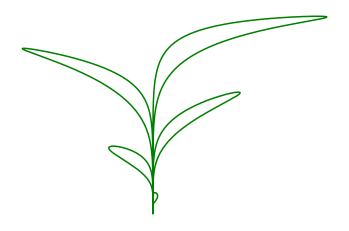

In [62]:
n = chapter_number
t = np.linspace(0, (2*(n-1)+1)*np.pi/2, 1000)
x = t*np.cos(t)**3
y = 9*t*np.sqrt(np.abs(np.cos(t))) + t*np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [63]:
end = time.time()
print(f'Chapter {chapter_number} took {int(end - start):d} seconds')

Chapter 5 took 753 seconds
